In [3]:
import nltk, datetime

import seaborn as sns
import pandas as pd
sns.set()

from nltk.corpus import conll2002
from pattern.nl import sentiment

import matplotlib.pyplot as plt

In [4]:
tweets = pd.read_csv('good/extracted/all_tweets.csv')

In [3]:
print(len(tweets))

30473


In [6]:
print(len(tweets[~tweets['tweet'].isna()]))

25769


In [3]:
tweets

,id,tweet,date,username
0,958752357420060672,Er een gestart voor support aan Den Haag d...,1.517419e+09,NaN
1,958760941419626497,Er een gestart voor support aan Den Haag d...,1.517419e+09,NaN
2,958762932443205632,Er een gestart voor support aan Den Haag d...,1.517419e+09,NaN
3,958768907560669184,Zeventig boeren uit willen naar Den Haag kom...,1.517423e+09,NaN
4,958770805151797249,Zeventig boeren uit willen naar Den Haag kom...,1.517423e+09,NaN
...,...,...,...,...
30468,1230619126885994501,NaN,NaN,NaN
30469,1230622976242044933,is dus terecht. Het stikstofbeleid is gebasee...,1.582238e+09,NaN
30470,1230624185656979456,"Onze boeren, onze helden!\n\n \n",1.582091e+09,NaN
30471,1230624189813592065,is dus terecht. Het stikstofbeleid is gebasee...,1.582238e+09,NaN


In [4]:
tweets.to_csv('good/extracted/all_tweets.csv', index=False)

In [5]:
def convert_date(row):
    try:
        return datetime.date.fromtimestamp(row['date'])
    except:
        return None

tweets['datetime'] = tweets.apply(lambda row: convert_date(row), axis=1)
tweets.index = pd.to_datetime(tweets['datetime'])

In [6]:
tweets['sentiment'] = tweets.apply(lambda row: sentiment(row['tweet'])[0], axis=1)
tweets['sentiment_certainty'] = tweets.apply(lambda row: sentiment(row['tweet'])[1], axis=1)

In [12]:
len(tweets[tweets['sentiment_certainty']>0.6])

8550

In [15]:
text_data = tweets['tweet']
print(len(text_data))

30473


In [16]:
sentiments = []
for row in text_data:
    s = sentiment(row)
    sentiments.append(s)

sentiments_df = pd.DataFrame(sentiments)
sentiments_df.columns = ['sentiment', 'sentiment_certainty']

8550


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f08bb2da250>,
      dtype=object)

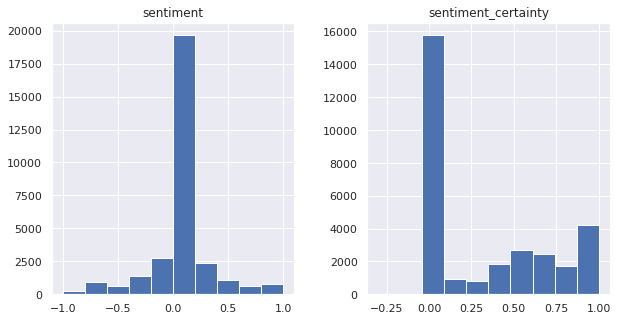

In [25]:
certain_df = sentiments_df[(sentiments_df['sentiment_certainty']>0.6)]
print(len(certain_df))
sentiments_df.hist(figsize=(10,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f08bb4076d0>,
      dtype=object)

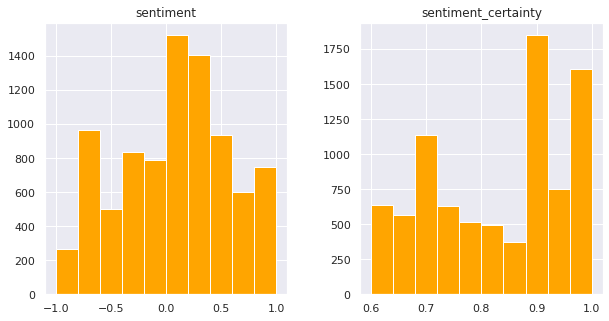

In [23]:
certain_df.hist(color='orange', figsize=(10,5))

In [26]:
certain_df.groupby(pd.Grouper(freq='d')).count()['id'].plot(title='Number of tweets over time', figsize=(20, 5), logy=True)

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

KeyboardInterrupt: 

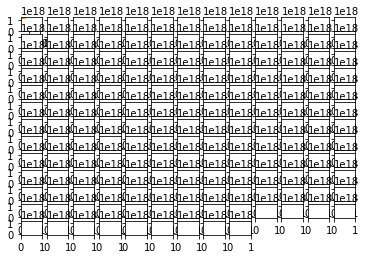

In [73]:
tweets[tweets['datetime']>datetime.date(2019,9,1)].groupby(pd.Grouper(freq='d'))[['sentiment']].boxplot()

In [14]:
sentiments_df.describe()

,0,1
count,30473.000000,30473.000000
mean,0.033390,0.318387
std,0.281938,0.371010
min,-1.000000,-0.300000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.050000,0.650000
max,1.000000,1.000000


In [15]:
sentiment('Goed')

(0.55, 0.9)

In [7]:
all_tweets = tweets
peak_1 = all_tweets[(all_tweets['datetime']>datetime.date(2019,9,27)) & (all_tweets['datetime']<datetime.date(2019,10,4))]
peak_2 = all_tweets[(all_tweets['datetime']>datetime.date(2019,10,11)) & (all_tweets['datetime']<datetime.date(2019,10,19))]
peak_3a = all_tweets[(all_tweets['datetime']>datetime.date(2019,12,11)) & (all_tweets['datetime']<datetime.date(2019,12,16))]
peak_3 = all_tweets[(all_tweets['datetime']>datetime.date(2019,12,11)) & (all_tweets['datetime']<datetime.date(2019,12,21))]
peak_4 = all_tweets[(all_tweets['datetime']>datetime.date(2020,2,14)) & (all_tweets['datetime']<datetime.date(2020,4,2))]

In [108]:
def peak_plotter(peak, peak_no, certainty_threshold=0):
    peak = peak[peak['sentiment_certainty'] > certainty_threshold]
    print("Number of tweets", len(peak))
    peak_sentiment = peak
    
    fig, ax = plt.subplots(figsize=(12,6))
    peak[peak['sentiment']>0].groupby(pd.Grouper(freq='d')).count()['id'].plot(c='darkgreen')
    
    peak[peak['sentiment']<0].groupby(pd.Grouper(freq='d')).count()['id'].plot(c='darkred')
    ax.set_xlabel('Day')
    ax.set_ylabel('Number of tweets')
    ax.grid(False)
    
    peak_sentiment = peak
#     fig, ax = plt.subplots(figsize=(12,6))
    ax = ax.twinx()
    peak_sentiment_positive = peak[peak['sentiment']>0].groupby(pd.Grouper(freq='d'))['sentiment'].mean().plot(label="Postive", c="green", yerr=peak[peak['sentiment']>0].groupby(pd.Grouper(freq='d'))['sentiment'].std())
    peak_sentiment_negative = peak[peak['sentiment']<0].groupby(pd.Grouper(freq='d'))['sentiment'].mean().plot(label="Negative", c="red", yerr=peak[peak['sentiment']<0].groupby(pd.Grouper(freq='d'))['sentiment'].std())
    ax.set_xlabel('Day')
    ax.set_ylabel('Sentiment')
    ax.set_ylim((-1.1, 1.1))
    plt.title(f'Number of tweets with sentiment over time in peak {peak_no}')
    plt.show()
    fig, ax = plt.subplots(figsize=(12,6))
    grouper = pd.Grouper(freq='d')
    try:
        peak_sentiment.boxplot(by=grouper, column='sentiment', ax=ax)
    except:
        pass
    ax.set_xlabel("Day")
    ax.set_xticklabels(peak['datetime'].unique())
    ax.set_ylim((-1.1, 1.1))
    plt.title(f"Daily tweet sentiment distribution in peak {peak_no}")
    plt.show()
#     plt.legend()

In [7]:
threshold = 0.6

Number of tweets 3091


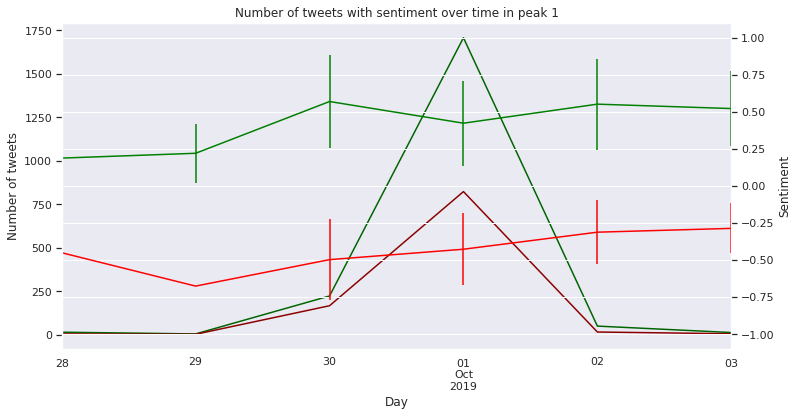

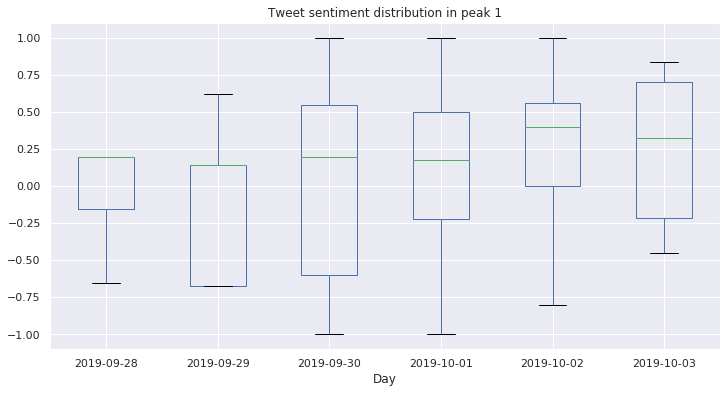

In [423]:
peak_plotter(peak_1, 1, threshold)

Number of tweets 1930


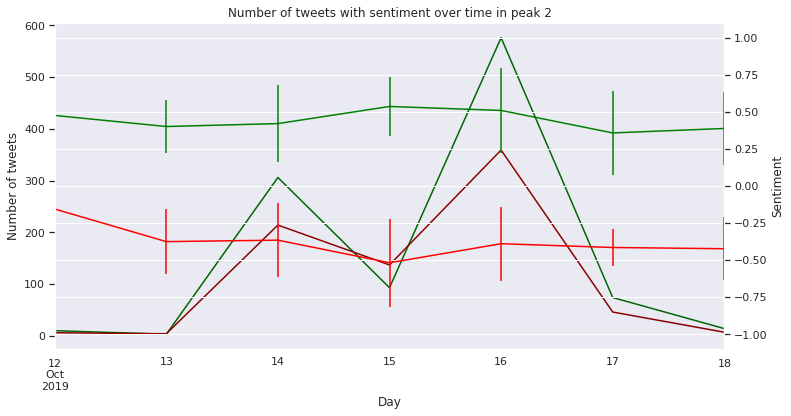

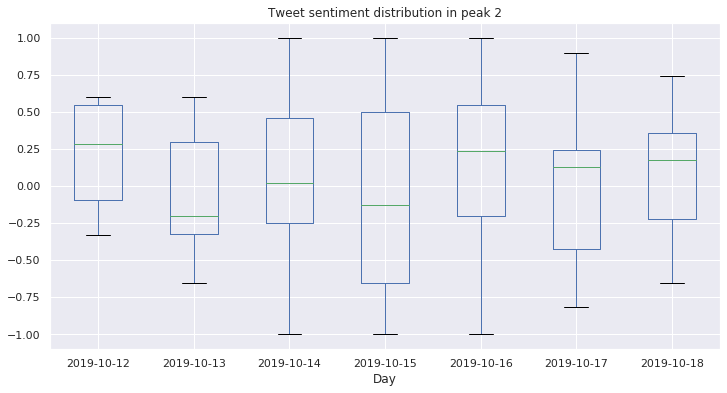

In [424]:
peak_plotter(peak_2, 2, threshold)

Number of tweets 1469


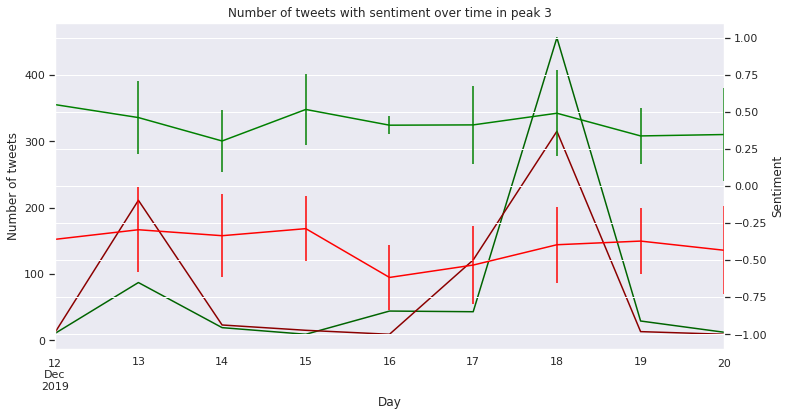

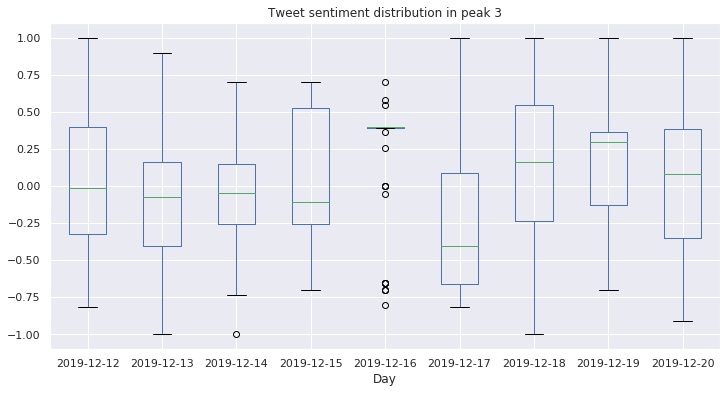

In [425]:
peak_plotter(peak_3, 3, threshold)

Number of tweets 901


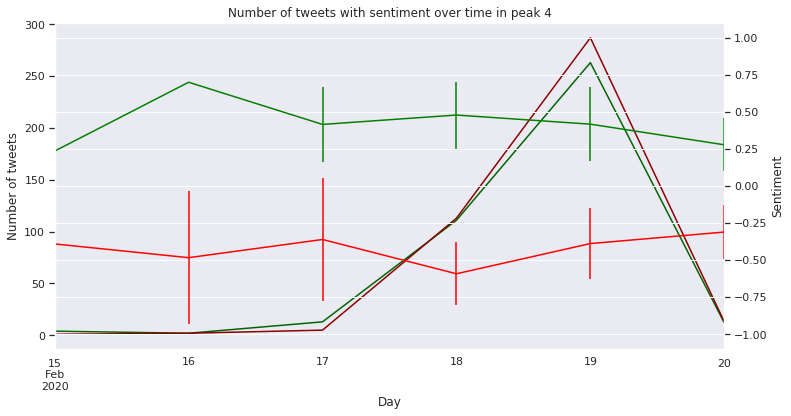

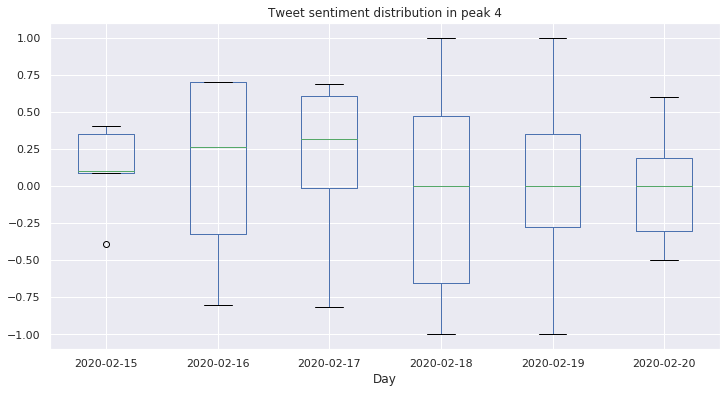

In [426]:
peak_plotter(peak_4, 4, threshold)

Text(0, 0.5, 'Moving average std of sentiment')

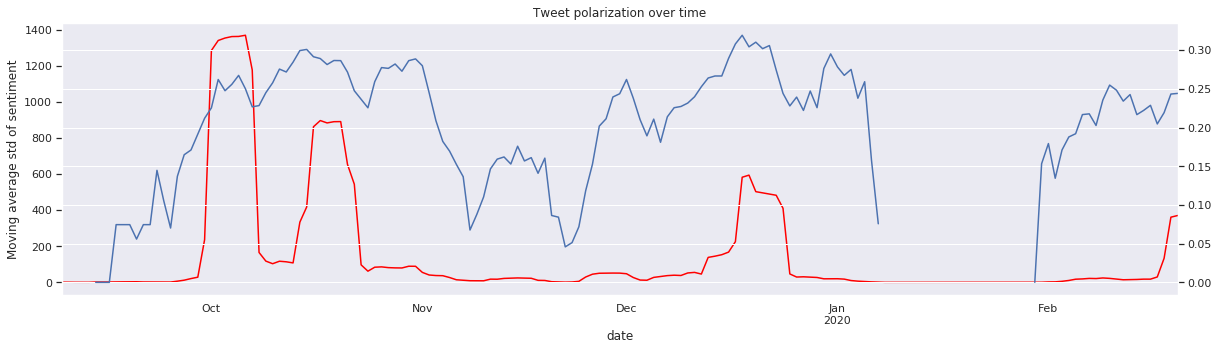

In [575]:
ax = tweets[tweets['datetime']>datetime.date(2019,9,1)].groupby(pd.Grouper(freq='d'))['sentiment'].count().rolling(7, min_periods=0).mean().plot(figsize=(20, 5), label='count', c='red')
ax.grid(False)
ax.set_ylabel('Moving average tweets per day')
ax.twinx()
tweets[tweets['datetime']>datetime.date(2019,9,1)].groupby(pd.Grouper(freq='d'))['sentiment'].std().rolling(7, min_periods=0).mean().plot(figsize=(20, 5), label='std')
plt.title('Tweet polarization over time')
ax.set_xlabel('date')
ax.set_ylabel('Moving average std of sentiment')

In [9]:
# peaks = [peak_1, peak_2, peak_3, peak_3a, peak_4]
# print('mean pos(std)\t mean neg(std)\t mean(std)\t count\t count pos\t count neg\t percentage pos')
# for peak in peaks:
# #     peak[(peak['sentiment_certainty'] > threshold)]['sentiment'].hist()
# #     plt.show()
#     m = peak[(peak['sentiment_certainty'] > threshold)]['sentiment'].mean()
#     s = peak[(peak['sentiment_certainty'] > threshold)]['sentiment'].std()
#     m_p = peak[(peak['sentiment_certainty'] > threshold) & (peak['sentiment']>0)]['sentiment'].mean()
#     s_p = peak[(peak['sentiment_certainty'] > threshold) & (peak['sentiment']>0)]['sentiment'].std()
#     m_n = peak[(peak['sentiment_certainty'] > threshold) & (peak['sentiment']<0)]['sentiment'].mean()
#     s_n = peak[(peak['sentiment_certainty'] > threshold) & (peak['sentiment']<0)]['sentiment'].std()
#     n = len(peak[(peak['sentiment_certainty'] > threshold)])
#     n_n = len(peak[(peak['sentiment_certainty'] > threshold) & (peak['sentiment']<0)])
#     n_p = len(peak[(peak['sentiment_certainty'] > threshold) & (peak['sentiment']>0)])
#     print(f'{m_p:.3f}({s_p:.3f})\t {m_n:.3f}({s_n:.3f})\t {m:.3f}({s:.3f})\t {n}\t {n_p}\t\t {n_n}\t\t {100*n_p/n:.2f}%')
threshold = 0.6
peak = all_tweets
m = peak[(peak['sentiment_certainty'] > threshold)]['sentiment'].mean()
s = peak[(peak['sentiment_certainty'] > threshold)]['sentiment'].std()
m_p = peak[(peak['sentiment_certainty'] > threshold) & (peak['sentiment']>0)]['sentiment'].mean()
s_p = peak[(peak['sentiment_certainty'] > threshold) & (peak['sentiment']>0)]['sentiment'].std()
m_n = peak[(peak['sentiment_certainty'] > threshold) & (peak['sentiment']<0)]['sentiment'].mean()
s_n = peak[(peak['sentiment_certainty'] > threshold) & (peak['sentiment']<0)]['sentiment'].std()
n = len(peak[(peak['sentiment_certainty'] > threshold)])
n_n = len(peak[(peak['sentiment_certainty'] > threshold) & (peak['sentiment']<0)])
n_p = len(peak[(peak['sentiment_certainty'] > threshold) & (peak['sentiment']>0)])
print(f'{m_p:.3f}({s_p:.3f})\t {m_n:.3f}({s_n:.3f})\t {m:.3f}({s:.3f})\t {n}\t {n_p}\t\t {n_n}\t\t {100*n_p/n:.2f}%')

0.450(0.283)	 -0.417(0.259)	 0.096(0.498)	 8550	 4927		 3350		 57.63%


In [9]:
import scipy.stats

In [10]:
peaks = [peak_1, peak_2, peak_3, peak_3a, peak_4]
datasets = []
for i, peak_1 in enumerate(peaks):
    i += 1
    for j, peak_2 in enumerate(peaks):
        j += 1
        if i < j:
            if i==4:
                i='3a'
            if j==4:
                j='3a'
            datasets.append([
            f'{i} pos vs {j} pos',
            peak_1[peak_1['sentiment']>0]['sentiment'],
            peak_2[peak_2['sentiment']>0]['sentiment']
            ])
            datasets.append([
            f'{i} neg vs {j} pos',
            peak_1[peak_1['sentiment']>0]['sentiment'],
            peak_2[peak_2['sentiment']>0]['sentiment']
            ])
            datasets.append([
            f'{i} pos vs {j} neg',
            peak_1[peak_1['sentiment']>0]['sentiment'],
            peak_2[peak_2['sentiment']>0]['sentiment']
            ])
            datasets.append([
            f'{i} neg vs {j} neg',
            peak_1[peak_1['sentiment']<0]['sentiment'],
            peak_2[peak_2['sentiment']<0]['sentiment']
            ])
            datasets.append([
            f'{i} vs {j} overall',
            peak_1['sentiment'],
            peak_2['sentiment']
            ])
for t, a, b in datasets:
    print(t, scipy.stats.ttest_ind(a, b))

SyntaxError: unmatched ']' (<ipython-input-10-2d1a2afc0184>, line 20)

In [474]:
# 1 vs 4 neg, 2 vs 4 neg, 3 vs 4 neg en 3a vs 4 neg significant
# 1 vs 3 overall, 2 vs 3a overall, 3 vs 4 overall significant
from sklearn.feature_extraction.text import CountVectorizer

In [524]:

for peak in peaks:
    print('-'*60)
    print('Meest negatief:')
    for x in peak.sort_values('sentiment').head(5)['tweet'].values:
        print(x)
        print('-' * 30)

    print('\nMeest positief:')
    for x in peak.sort_values('sentiment', ascending=False).head(5)['tweet'].values:
        print(x)
        print('-' * 30)

------------------------------------------------------------
Meest negatief:
Gut gut, maar ordinaire trouwstoeten laten ze de   schijnheilig door!!!
Schaam je!! 

------------------------------
En daar zijn ze al: de hypocriete steuntweets van politici voor de boeren. Trap er niet in! 
------------------------------
Gut gut, maar ordinaire trouwstoeten laten ze de   schijnheilig door!!!
Schaam je!! 

------------------------------
Vanuit Hitzum zijn de trekkers onderweg naar Den Haag.  Succes!!
------------------------------
Kom op Twitteraars hashtag   naar nummer 1!!!
------------------------------

Meest positief:
Goedemorgen, wat een prachtig beeld!       
------------------------------
Goedemorgen, wat een prachtig beeld!       
------------------------------
Geweldig! Daar staat ie! Onze  ! 

  
------------------------------
Goedemorgen, wat een prachtig beeld!       
------------------------------
30 jaar geleden. Politie toen: 'Tractoren houd je niet tegen.'  . Prachtig, manne

In [526]:
# Same without stop words
from stop_words import get_stop_words

stop_words = get_stop_words('nl')

for peak in peaks:
    print('-'*30)
    cv = CountVectorizer(stop_words=stop_words)
    counted_words = cv.fit_transform(peak['tweet'].fillna(''))
    counted_words = pd.DataFrame(counted_words.todense(), columns=cv.get_feature_names())
    top_words = counted_words.sum(axis=0).sort_values(ascending=False)
    i = 0
    for w, number in top_words.items():
        s, c = sentiment(w)
        print(number, w, s, c)
        i += 1
        if i>20:
            break
    i = 0
    print('pos')
    for w, number in top_words.items():
        s, c = sentiment(w)
        if s>0:
            print(number, w, s, c)
            i += 1
        if i>4:
            break
    i = 0
    print('neg')
    for w, number in top_words.items():
        s, c = sentiment(w)
        if s<0:
            print(number, w, s, c)
            i += 1
        if i>4:
            break

------------------------------
2721 boeren 0.0 0.0
886 the 0.0 0.0
870 den 0.0 0.0
854 haag 0.0 0.0
851 onze 0.0 0.0
606 we 0.0 0.0
536 farmers 0.0 0.0
525 jullie 0.0 0.0
495 malieveld 0.0 0.0
490 to 0.0 0.0
421 wel 0.0 0.0
391 vandaag 0.0 0.0
373 steun 0.0 0.0
361 gaat 0.0 0.0
355 geweldig 0.9 1.0
343 komen 0.0 0.0
334 nederland 0.0 0.0
333 protest -0.1 0.0
323 dutch 0.0 0.0
291 school 0.0 0.0
280 against 0.0 0.0
pos
355 geweldig 0.9 1.0
232 heel 0.13333333333333333 0.5666666666666668
183 mooi 0.7 1.0
181 trots 0.15000000000000002 1.0
177 massaal 0.2 0.55
neg
333 protest -0.1 0.0
268 laat -0.3 0.6
131 links -0.16666666666666666 0.5
95 blokkeren -0.1 0.0
84 rechts -0.06666666666666667 0.20000000000000004
------------------------------
1807 boeren 0.0 0.0
568 den 0.0 0.0
555 haag 0.0 0.0
547 the 0.0 0.0
320 to 0.0 0.0
285 groningen 0.0 0.0
246 trekkers 0.0 0.0
244 richting 0.0 0.0
240 farmers 0.0 0.0
239 onderweg 0.0 0.0
221 weer 0.0 0.0
209 malieveld 0.0 0.0
204 gaat 0.0 0.0
203 provin

In [502]:
t = pd.read_csv('tweets_99.csv')

In [527]:
for t in peak_3a[['id', 'tweet']].values:
    print(t)
    print('-' * 30)

[1204902093829681160
 'Is hier nog geen "schaamte" voor? Als je al grotendeels wordt betaald door subsidies en postcodeloterij mag je ook nog gezellig dineren met   terwijl de hardwerkende belastingbetalers de rekening van de zogenaamde   krijgen toegeschoven  ']
------------------------------
[1204907053464068096
 'Nog een mooie video van  \n  - Het gif van   en de journalistiek\n\nOok voor dit...\nWoensdag 18 december. \nDIT IS DE DAG OM OP TE STAAN OF VOOR ALTIJD TE ZWIJGEN! En daar hebben ze gelijk in!\n  ']
------------------------------
[1205013801097187328
 'Mansholt zou nu pleiten voor ‘boeren met de natuur’, zegt zijn biograaf.\n"Maar hij, juist hij, had als Europeaan ook beseft dat dit alleen kan met een hogere muur om het continent heen, om de slechte en goedkope producten tegen te houden."\n']
------------------------------
[1205025654238011393
 'Zijn de boeren nu opeens de slechteriken?? Ze hadden het zich eerder moeten realiseren, dan was dit niet nodig geweest!!\n\n   \n

------------------------------
[1205521288787320832 'Geen uitleg nodig..\n     \n']
------------------------------
[1205521375584231424
 "De boeren zijn het zat en vertrekken met z'n allen naar het buitenland!!! "]
------------------------------
[1205521575656722434 ' Dit is ons land. En we pakken het terug.']
------------------------------
[1205521861297295361 'Geen uitleg nodig..\n     \n']
------------------------------
[1205522052125544448
 'Dat   is overigens gewoon een cover up voor het verplaatsen van de kernwapens op  . Distraction in full force! Farmers Defence Force wel te verstaan!']
------------------------------
[1205522163714920448 'Wá barricades?! Hier zulde ‘t hebben...!   ']
------------------------------
[1205522279884578818 ' Go Farmers Go  \n']
------------------------------
[1205523448866508800 'Laten we   groot maken           ']
------------------------------
[1205524144282050561
 '**Boerenstaking wanneer staan de varkens op het malieveld voor een beter leven**  

In [571]:
asdf = all_tweets[(all_tweets['datetime']>datetime.date(2019,11,1)) & (all_tweets['datetime']<datetime.date(2019,12,1))]
print(len(asdf))
for t in asdf[['id', 'tweet']].values:
    print(t)
    print('-' * 30)

607
[1190556460473868288
 'Het lijkt wel of iedereen boos is in Nederland....de boeren  , de bouw  , de zorg  , de leraren  . Ondertussen zien de peilingen er week na week bijna hetzelfde uit. Met de VVD als grootste partij. Is dat logisch?']
------------------------------
[1190614385934381057
 'Het lijkt wel of iedereen boos is in Nederland....de boeren  , de bouw  , de zorg  , de leraren  . Ondertussen zien de peilingen er week na week bijna hetzelfde uit. Met de VVD als grootste partij. Is dat logisch?']
------------------------------
[1190669480629850113
 'Ik houd van de boeren; ze weten niet genoeg om verkeerd te redeneren.\n       ']
------------------------------
[1190674390876340224
 'Is de premier met zijn gedachte al bij een volgende baan?     ']
------------------------------
[1190948255347216385
 'Het stikstofdossier stinkt onderhand harder dan onze mest  .\n    ']
------------------------------
[1190951451499094017
 'Het stikstofdossier stinkt onderhand harder dan onze mes

[1199378629060378625 'Boeren in Duitsland leggen Berlijn plat. ']
------------------------------
[1199388730202771456 'Boeren in Duitsland leggen Berlijn plat. ']
------------------------------
[1199395489772457984 'Onderstussen in Berlijn  \n \n  ']
------------------------------
[1199396429707595781 'Onderstussen in Berlijn  \n \n  ']
------------------------------
[1199398578441068550 'Onderstussen in Berlijn  \n \n  ']
------------------------------
[1199400762826219520 ' in Duitsland vandag.\nIk wens succes   ']
------------------------------
[1199410449156059136 'Onderstussen in Berlijn  \n \n  ']
------------------------------
[1199411816121741312 ' Duitsland ']
------------------------------
[1199414369580453889 ' Duitsland ']
------------------------------
[1199415672893296640
 ' Frankrijk\n\nUit verschillende delen van Frankrijk komen op dit moment tractoren samen, die morgen gezamenlijk de wegen richting Parijs gaan blokkeren.']
------------------------------
[11994171656670

In [41]:
# Same without stop words
from stop_words import get_stop_words

stop_words = get_stop_words('nl')

from wordcloud import WordCloud
text = ''
for sentence in all_tweets['tweet']:
    if type(sentence)!=float:
        sentence = sentence.split()
        for word in sentence:
            if not word in stop_words:
                text += word + ' '
# Generate a word cloud image

(-0.5, 1919.5, 1079.5, -0.5)

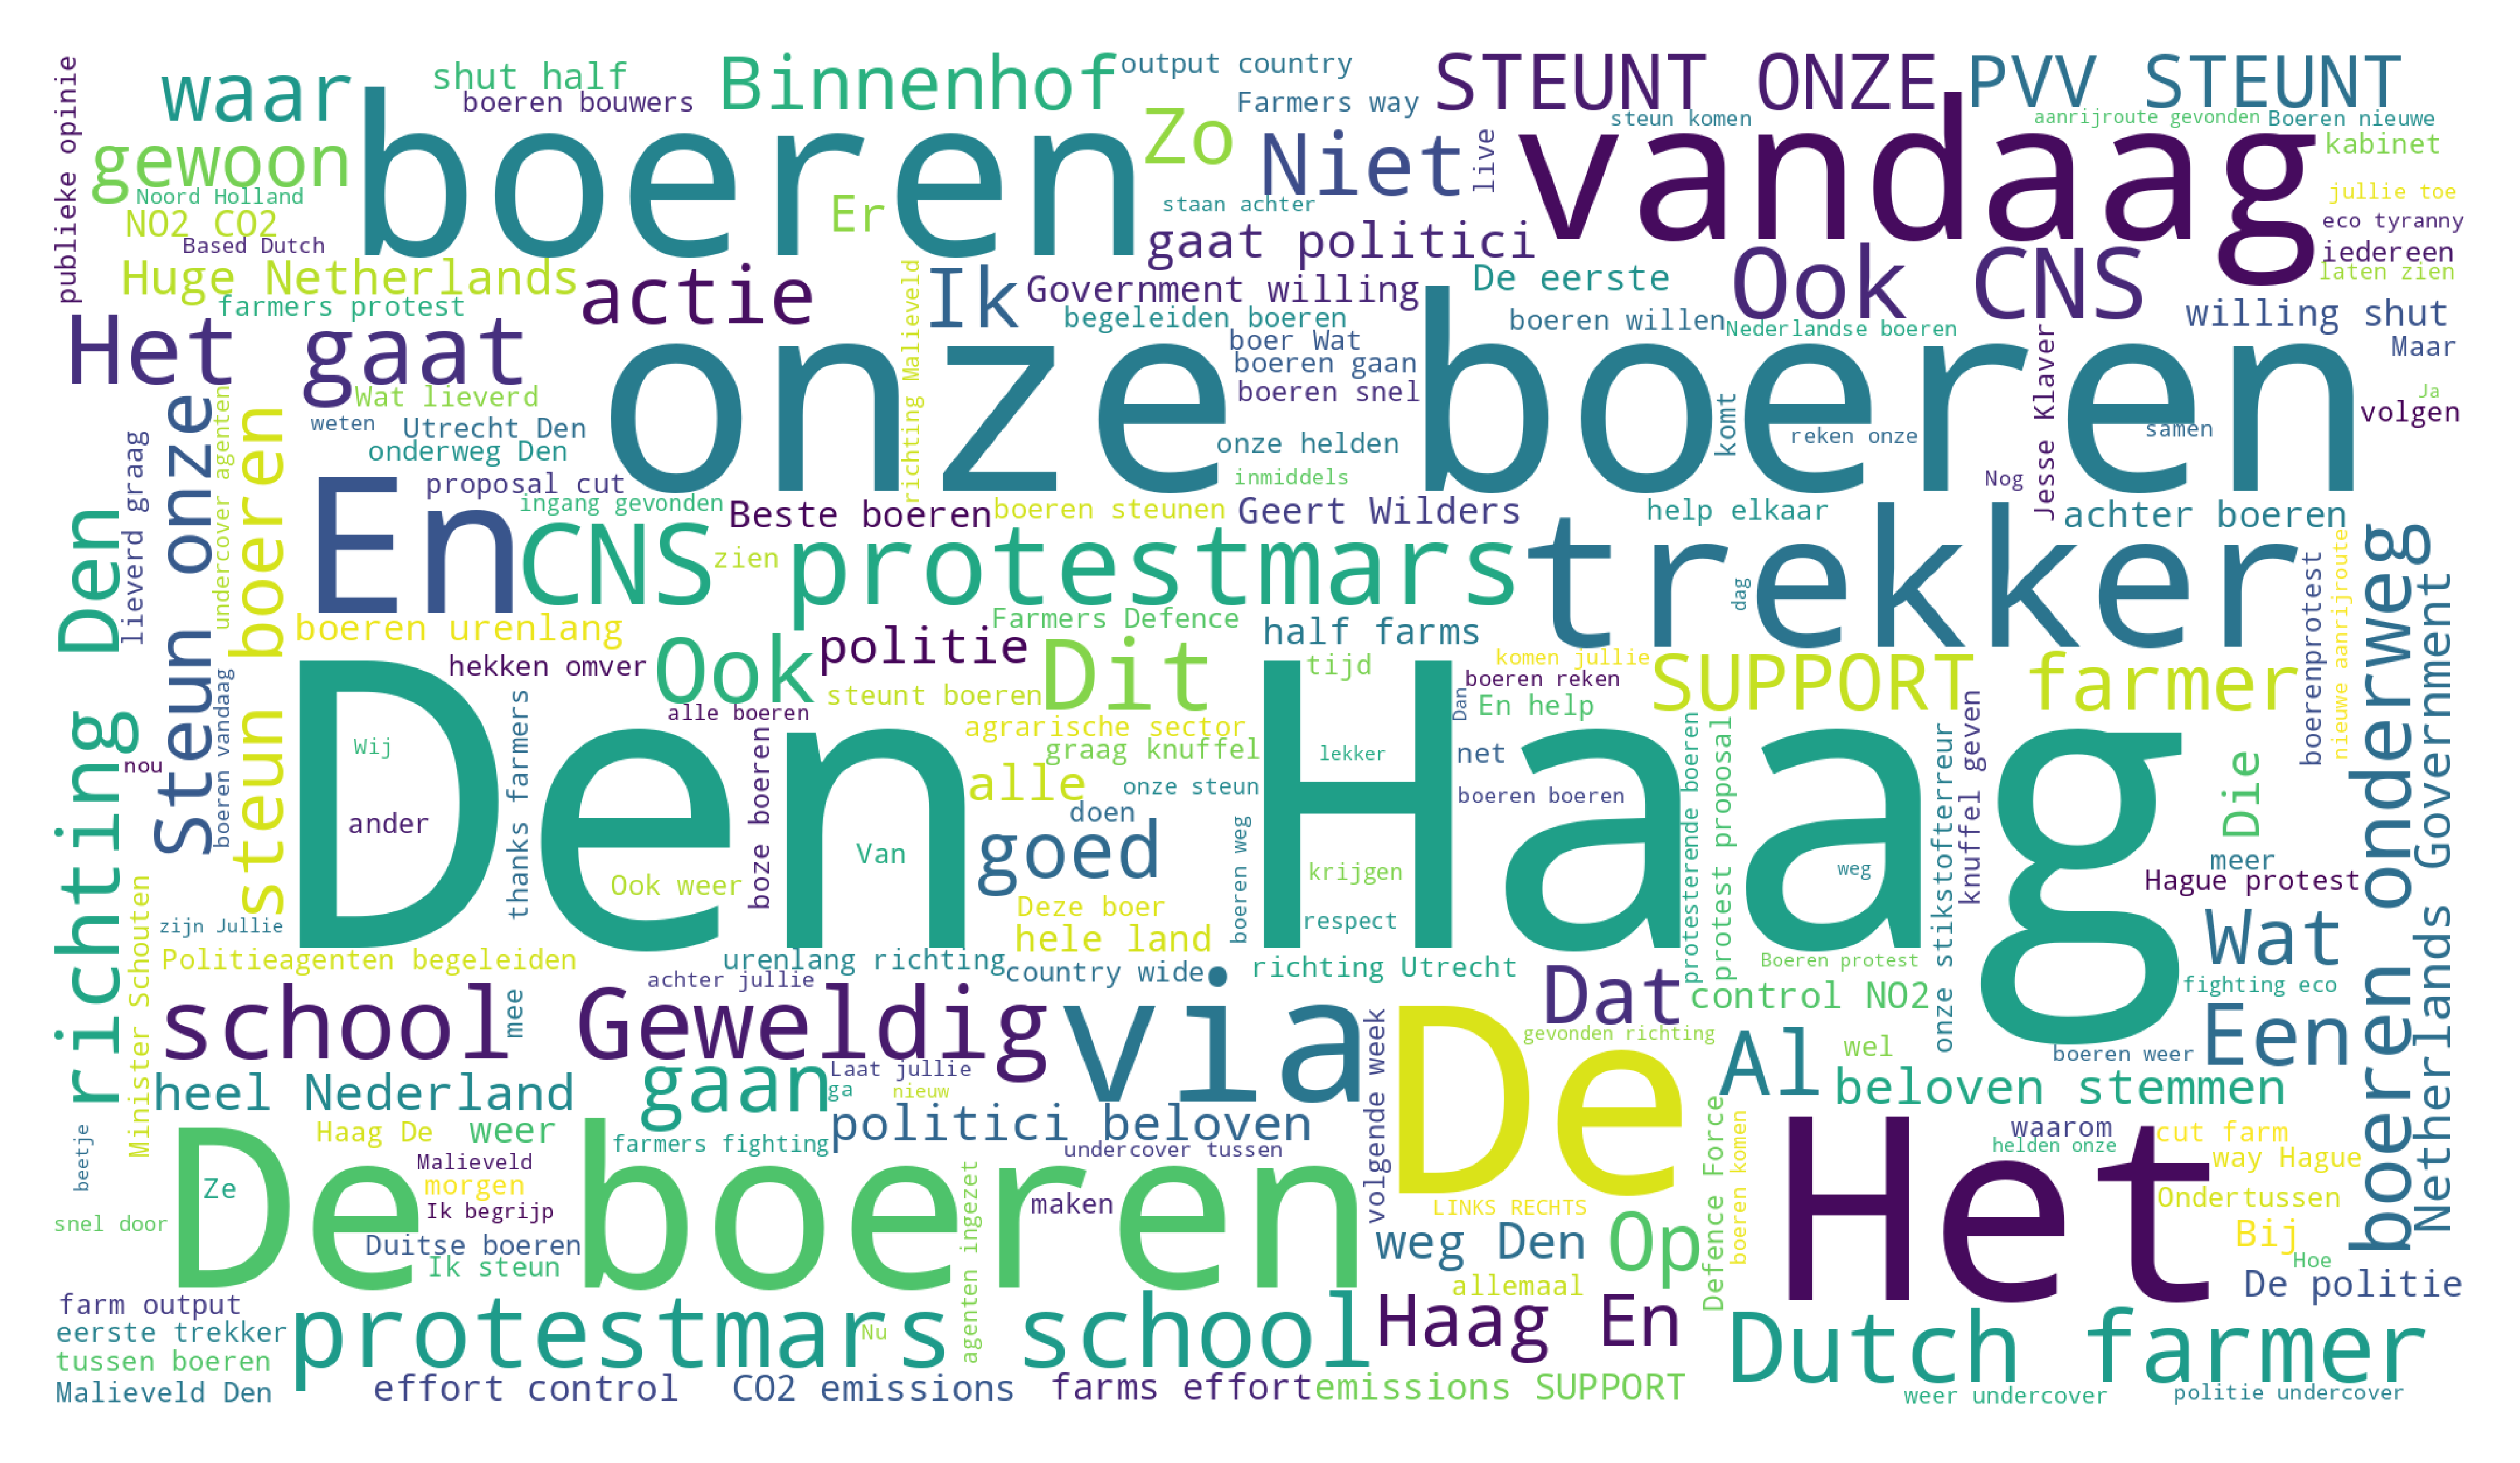

In [59]:
wordcloud = WordCloud(background_color='white', width=1920, height=1080).generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(dpi=900)
plt.imshow(wordcloud)
plt.axis("off")

In [60]:
wordcloud.to_file('test.png')

In [61]:
# Same without stop words
from stop_words import get_stop_words

stop_words = get_stop_words('nl')

from wordcloud import WordCloud

for i, peak in enumerate(peaks):
    text = ''
    for sentence in peak['tweet']:
        if type(sentence)!=float:
            sentence = sentence.split()
            for word in sentence:
                if not word in stop_words:
                    text += word + ' '
    wordcloud = WordCloud(background_color='white', width=1920, height=1080).generate(text)      
    wordcloud.to_file(f'peak_{i}.png')

In [62]:
all_tweets = tweets
peak_1 = all_tweets[(all_tweets['datetime']>datetime.date(2019,9,27)) & (all_tweets['datetime']<datetime.date(2019,10,4))]
peak_2 = all_tweets[(all_tweets['datetime']>datetime.date(2019,10,11)) & (all_tweets['datetime']<datetime.date(2019,10,19))]
peak_3a = all_tweets[(all_tweets['datetime']>datetime.date(2019,12,11)) & (all_tweets['datetime']<datetime.date(2019,12,16))]
peak_3 = all_tweets[(all_tweets['datetime']>datetime.date(2019,12,11)) & (all_tweets['datetime']<datetime.date(2019,12,21))]
peak_4 = all_tweets[(all_tweets['datetime']>datetime.date(2020,2,14)) & (all_tweets['datetime']<datetime.date(2020,4,2))]

In [89]:
peaks_neg = pd.DataFrame()
peaks_pos = pd.DataFrame()
peaks_all = pd.DataFrame()

peaks = [peak_1, peak_2, peak_3, peak_4]

for i, peak in enumerate(peaks):
    ng = peak.copy()
    ps = peak.copy()
    ng = ng[ng['sentiment'] < 0]
    ps = ps[ps['sentiment'] > 0]
    al = peak.copy()
    ng['peak'] = i+1
    ps['peak'] = i+1
    al['peak'] = i+1
    peaks_neg = peaks_neg.append(ng)
    peaks_pos = peaks_pos.append(ps)
    peaks_all = peaks_all.append(al)
    print(len(ng), len(ps))

2003 3096
1361 1952
1232 1202
679 620


Text(0.5, 1.0, 'sentiment of negative tweets')

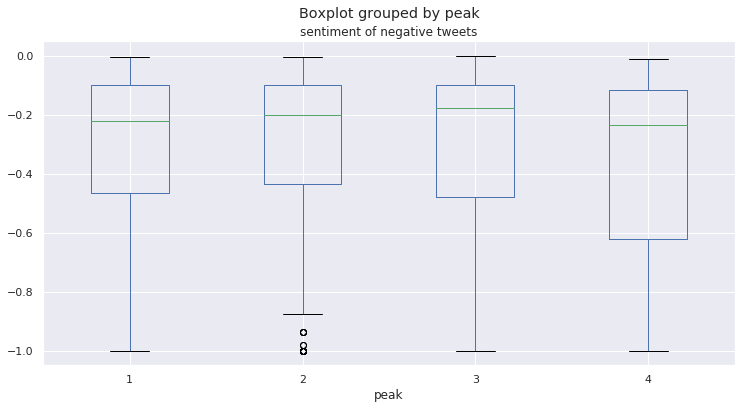

In [96]:
fig, ax = plt.subplots(figsize=(12,6))
peaks_neg.boxplot(by='peak', column='sentiment', ax=ax)
ax.set_title('sentiment of negative tweets')

Text(0.5, 1.0, 'sentiment of positive tweets')

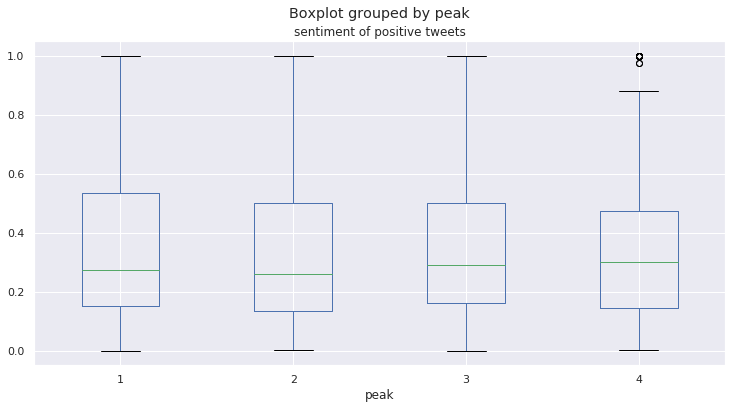

In [97]:
fig, ax = plt.subplots(figsize=(12,6))
peaks_pos.boxplot(by='peak', column='sentiment', ax=ax)
ax.set_title('sentiment of positive tweets')

Text(0.5, 1.0, 'sentiment of all tweets')

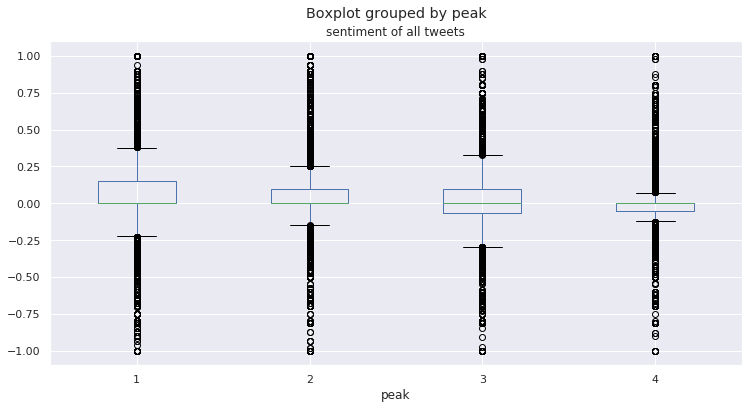

In [98]:
fig, ax = plt.subplots(figsize=(12,6))
peaks_all.boxplot(by='peak', column='sentiment', ax=ax)
ax.set_title('sentiment of all tweets')

Number of tweets 7391


ValueError: Length mismatch: Expected axis has 7391 elements, new values have 28 elements

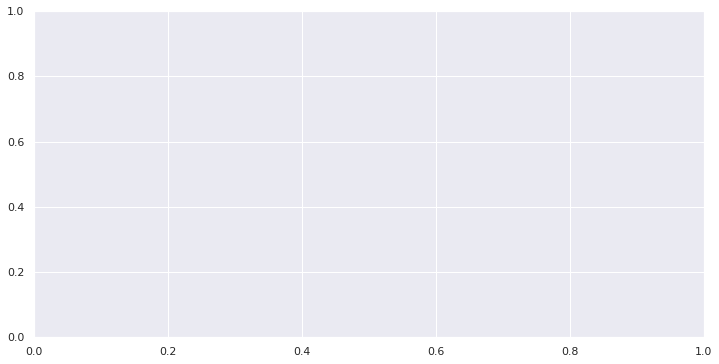

In [142]:
import numpy as np
tester = peak_1.append(peak_2).append(peak_3).append(peak_4)

peak = tester[tester['datetime']>datetime.date(2019,9,1)]
peak = peak[peak['sentiment_certainty'] > 0.6]
print("Number of tweets", len(peak))
peak_sentiment = peak

fig, ax = plt.subplots(figsize=(12,6))
peak.reset_index(drop=True)
x = np.arange(0,peak['datetime'].nunique())

peak_sentiment = peak
peak_sentiment_positive = peak[peak['sentiment']>0].groupby(pd.Grouper(freq='d'))['sentiment'].mean().plot(label="Postive", c="green", yerr=peak[peak['sentiment']>0].groupby(pd.Grouper(freq='d'))['sentiment'].std())
peak_sentiment_negative = peak[peak['sentiment']<0].groupby(pd.Grouper(freq='d'))['sentiment'].mean().plot(label="Negative", c="red", yerr=peak[peak['sentiment']<0].groupby(pd.Grouper(freq='d'))['sentiment'].std())
ax.set_xlabel('Day')
ax.set_ylabel('Sentiment')
ax.set_ylim((-1.1, 1.1))
plt.title(f'Number of tweets with sentiment over time')
plt.show()

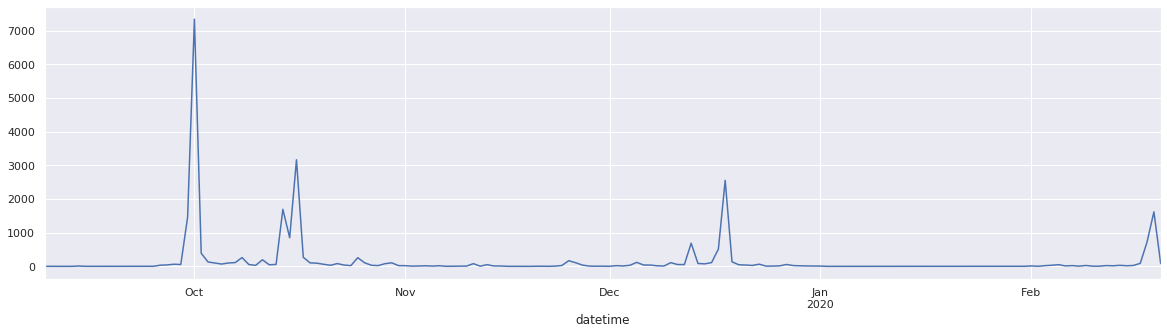

In [149]:
tweets[tweets['datetime']>datetime.date(2019,9,1)].groupby(pd.Grouper(freq='d')).count()['id'].plot(figsize=(20, 5))

In [156]:
min([x for x in tweets['datetime'] if x])

datetime.date(2013, 12, 19)

In [157]:
max([x for x in tweets['datetime'] if x])

datetime.date(2020, 2, 20)

In [178]:
tweets[tweets['datetime']==datetime.date(2013, 12, 19)]['tweet'].values

array(['Nee, dat kun je natuurlijk niet zeggen, dat de anti-islamsticker van   net zoiets is als een bordje met Verboden voor Joden.'],
      dtype=object)